In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("NumPy version: {}".format(np.__version__))

import scipy as sp
print("SciPy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.6.3 |Anaconda custom (64-bit)| (default, Oct 13 2017, 12:02:49) 
[GCC 7.2.0]
pandas version: 0.20.3
matplotlib version: 2.2.2
NumPy version: 1.13.3
SciPy version: 0.19.1
IPython version: 6.1.0
scikit-learn version: 0.19.0


In [2]:
import matplotlib.pyplot as plt
% matplotlib notebook

# Creating suplots

<IPython.core.display.Javascript object>


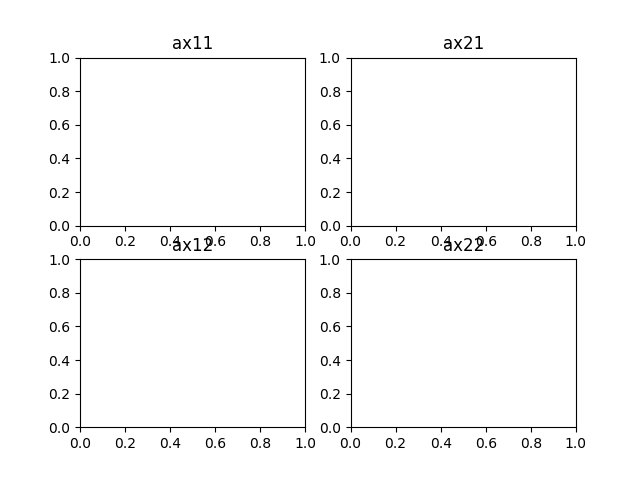

In [2]:
# One suplot at a time
ax11 = plt.subplot(2, 2, 1)
ax21 = plt.subplot(2, 2, 2)
ax12 = plt.subplot(2, 2, 3)
ax22 = plt.subplot(2, 2, 4)

ax11.set_title("ax11")
ax21.set_title("ax21")
ax12.set_title("ax12")
ax22.set_title("ax22")

<IPython.core.display.Javascript object>


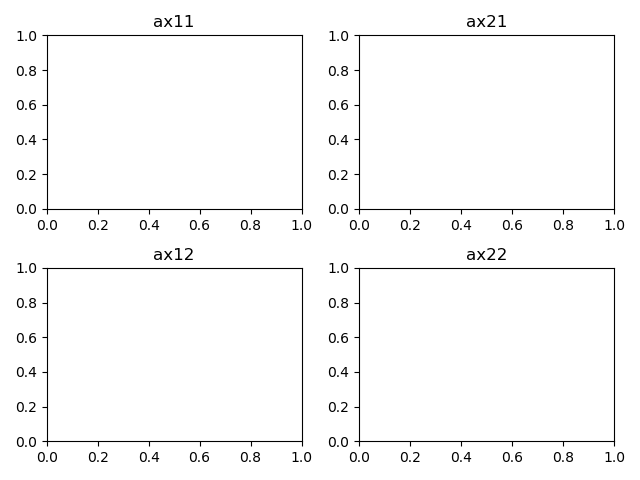

In [4]:
# Create multiple subplots and referred to by axes.ravel() 
fig, axes = plt.subplots(2, 2)
ax11, ax21, ax12, ax22 = axes.ravel()
ax11.set_title("ax11")
ax21.set_title("ax21")
ax12.set_title("ax12")
ax22.set_title("ax22")
# Adjust spaces between subplots
plt.tight_layout() # makes stuff fit - usually works

<IPython.core.display.Javascript object>


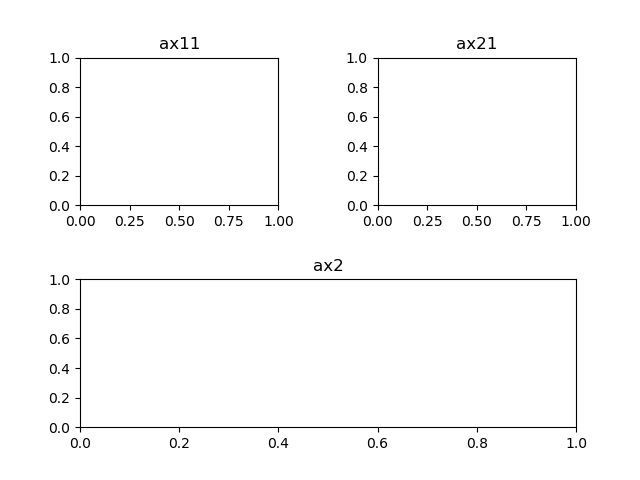

In [7]:
# Another way to adjust spaces between subplots
plt.figure()
ax11 = plt.subplot(2, 2, 1)
ax21 = plt.subplot(2, 2, 2)
ax2 = plt.subplot(2, 1, 2)
ax11.set_title("ax11")
ax21.set_title("ax21")
ax2.set_title("ax2")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, 
                    wspace=0.5, hspace=0.5)

<IPython.core.display.Javascript object>


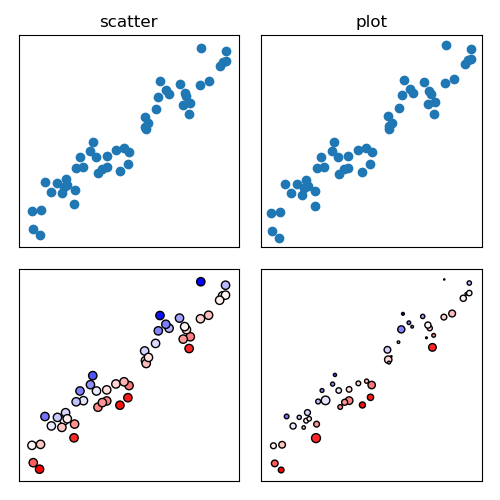

In [3]:
# Scatterplots
x = np.random.uniform(size=50)
y = x + np.random.normal(0, .1, size=50)

fig, ax = plt.subplots(2, 2, figsize=(5, 5),
                       subplot_kw={'xticks': (), 'yticks': ()})
ax[0, 0].scatter(x, y)
ax[0, 0].set_title("scatter")
ax[0, 1].plot(x, y, 'o')
ax[0, 1].set_title("plot")
ax[1, 0].scatter(x, y, c=x-y, cmap='bwr', edgecolor='k')
ax[1, 1].scatter(x, y, c=x-y, s=np.abs(np.random.normal(scale=20, size=50)), cmap='bwr', edgecolor='k')
plt.tight_layout()

# Twinx

In [246]:
df = pd.DataFrame({'Math PhDs awareded (US)': {'2000': 1050,
  '2001': 1010,
  '2002': 919,
  '2003': 993,
  '2004': 1076,
  '2005': 1205,
  '2006': 1325,
  '2007': 1393,
  '2008': 1399,
  '2009': 1554},
 'Total revenue by arcades (US)': {'2000': 1196000000,
  '2001': 1176000000,
  '2002': 1269000000,
  '2003': 1240000000,
  '2004': 1307000000,
  '2005': 1435000000,
  '2006': 1601000000,
  '2007': 1654000000,
  '2008': 1803000000,
  '2009': 1734000000}})

<IPython.core.display.Javascript object>


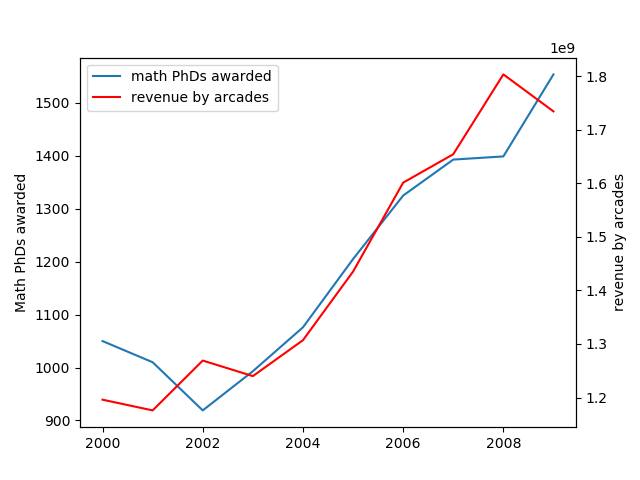

In [262]:
plt.figure()
ax1 = plt.gca()
line1, = ax1.plot(years, phds)
ax2 = ax1.twinx()
line2, = ax2.plot(years, revenue, c='r')
plt.legend((line1, line2), ("math PhDs awarded", "revenue by arcades"))
ax1.set_ylabel("Math PhDs awarded")
ax2.set_ylabel("revenue by arcades")

# Hexagon heatmap

In [17]:
x1, y1 = 1 / np.random.uniform(-1000, 100, size=(2, 10000))
x2, y2 = np.dot(np.random.uniform(size=(2, 2)), np.random.normal(size=(2, 1000)))
x = np.hstack([x1, x2])
y = np.hstack([y1, y2])

<IPython.core.display.Javascript object>


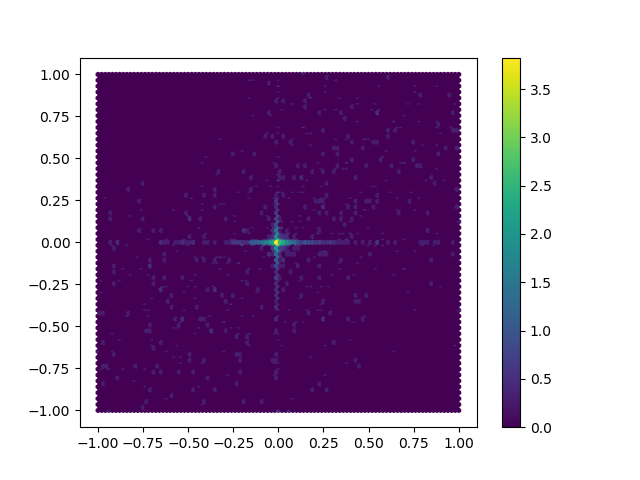

In [18]:
plt.figure()
plt.hexbin(x, y, bins='log', extent=(-1, 1, -1, 1))
plt.colorbar()

# Plot decision boundary - Example 1

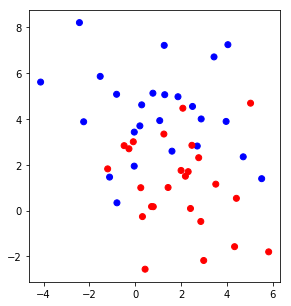

In [20]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline
# Change default matplotlib values
# plt.rcParams['image.cmap'] = "bwr"
# plt.rcParams['figure.dpi'] = "300"

X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
plt.figure(figsize=(5,5))
plt.gca().set_aspect("equal")
plt.scatter(X[:, 0], X[:, 1], c=y)

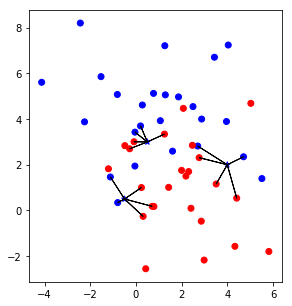

In [23]:
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

def plot_n_neighbors(X, y, n_neighbors=1):
    X_test = np.array([[0.5, 3], [4, 2], [-.5, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure(figsize=(5,5))
    plt.gca().set_aspect("equal")
    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                    X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = plt.scatter(X_test[:, 0], X_test[:, 1], c=clf.predict(X_test), marker="*")
    training_points = plt.scatter(X[:, 0], X[:, 1], c=y)    
plot_n_neighbors(X, y, n_neighbors=5)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.85


In [24]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):                                       
    # multiclass                                                                                                                 
    if eps is None:                                                                                                              
      eps = X.std() / 2.                                                                                                       

    if ax is None:                                                                                                               
      ax = plt.gca()                                                                                                           

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps                                                                      
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps                                                                      
    xx = np.linspace(x_min, x_max, 1000)                                                                                         
    yy = np.linspace(y_min, y_max, 1000)                                                                                         

    X1, X2 = np.meshgrid(xx, yy)                                                                                                 
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                                                                       
    decision_values = classifier.predict(X_grid)                                                                                 
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,                                                           
                                                       y_min, y_max),                                                          
            aspect='auto', origin='lower', alpha=alpha)                                                               
    ax.set_xlim(x_min, x_max)                                                                                                    
    ax.set_ylim(y_min, y_max)                                                                                                    
    ax.set_xticks(())                                                                                                            
    ax.set_yticks(())  

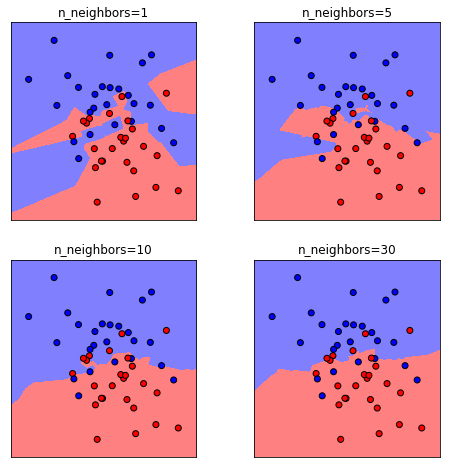

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, n_neighbors in zip(axes.ravel(), [1, 5, 10, 30]):
    ax.set_title("n_neighbors={}".format(n_neighbors))
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plot_2d_classification(clf, X, ax=ax, alpha=.5)
    ax.set_aspect("equal")

# Decsion Boundary - Example 2

In [102]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

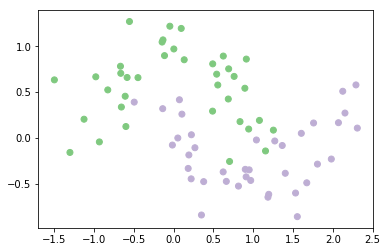

In [106]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Accent(y_train))
xlim = plt.xlim()
ylim = plt.ylim()

In [107]:
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
X_grid = np.c_[xx.ravel(), yy.ravel()]

In [108]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.88


(-0.9822983882848757, 1.391851119202332)

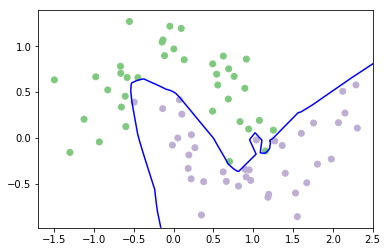

In [109]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Accent(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

# Bound, fill between

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV, train_test_split

In [30]:
data = load_breast_cancer()
X, y = data.data, data.target
X = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

param_grid = {'n_neighbors':  np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

results = pd.DataFrame(grid.cv_results_)

best mean cross-validation score: 0.974
best parameters: {'n_neighbors': 7}
test-set score: 0.965


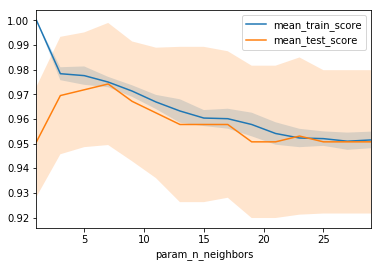

In [31]:
results.plot('param_n_neighbors', 'mean_train_score')
results.plot('param_n_neighbors', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_n_neighbors.astype(np.int),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()

# Plot features against target

In [93]:
from sklearn.datasets import load_boston
boston = load_boston()

In [94]:
from sklearn.utils import shuffle
X, y = boston.data, boston.target

In [95]:
X.shape

(506, 13)

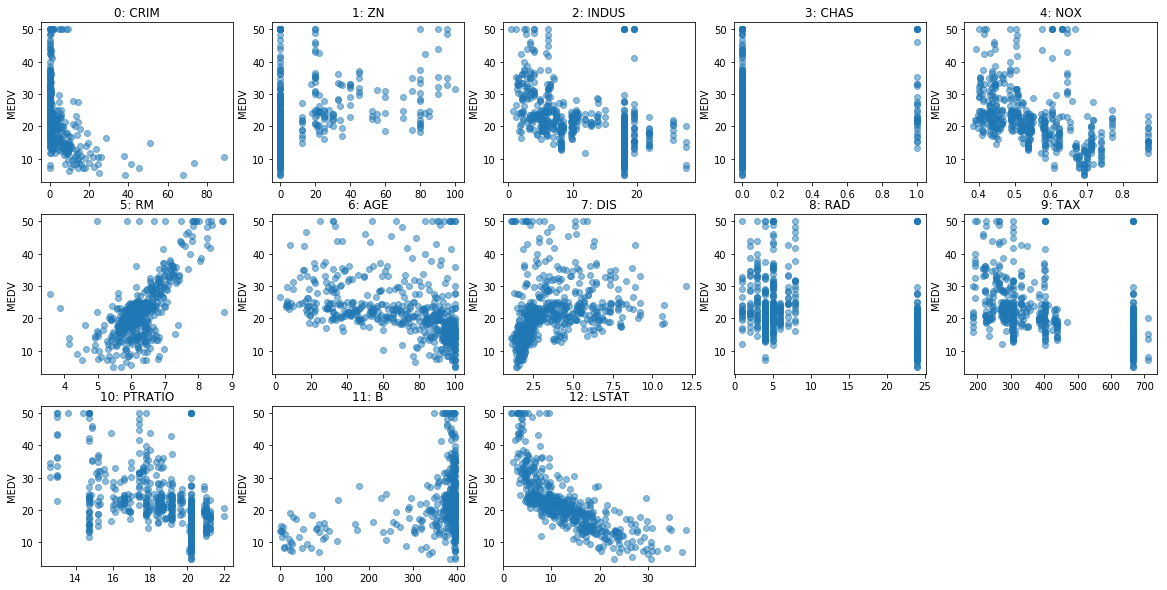

In [96]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

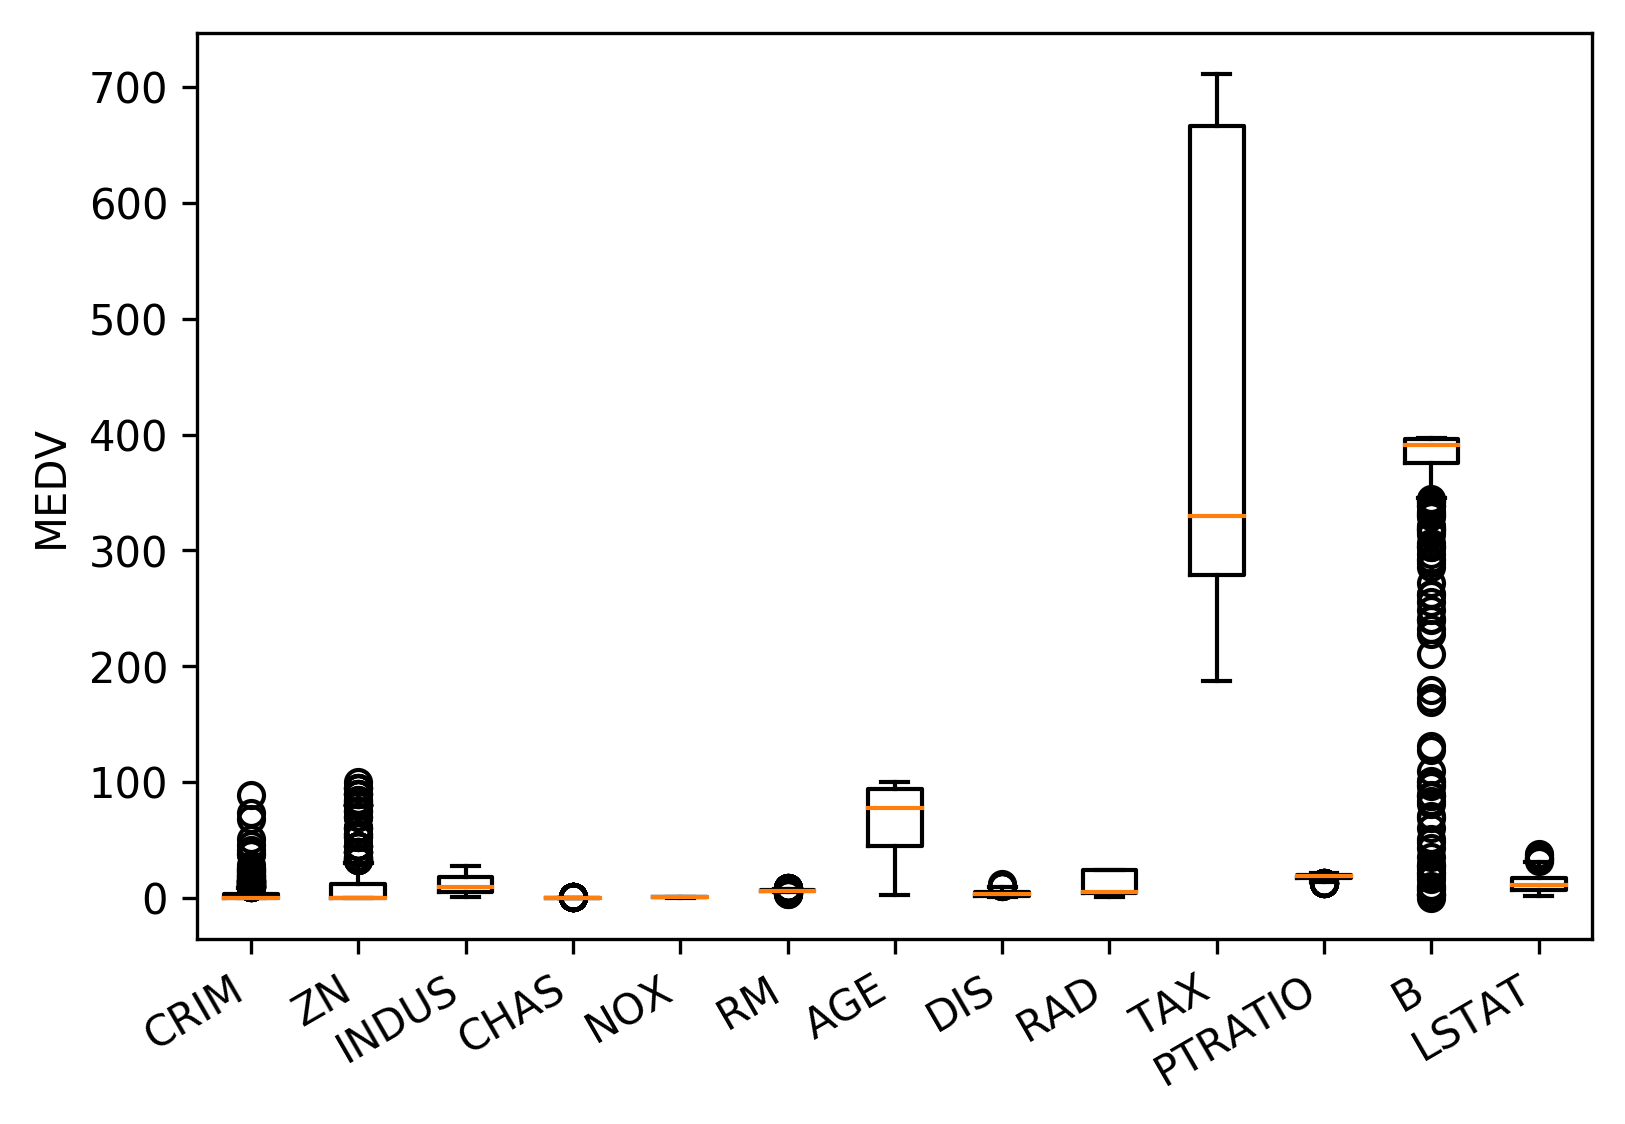

In [5]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), boston.feature_names, rotation=30, ha="right")
plt.ylabel("MEDV")

# Plot all features - Pandas Scatter Matrix

In [99]:
rng = np.random.RandomState(0)
X = rng.normal(size=(100, 3))
y = X[:, 0] > 0
X *= np.array((1, 15, 20))
X = np.dot(X, rng.normal(size=(3, 3)))

Text(0.5,0.98,'Data')

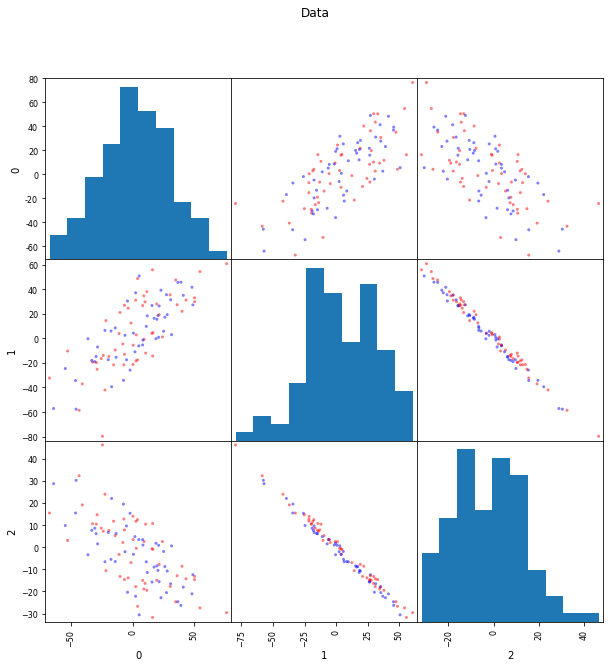

In [101]:
pd.plotting.scatter_matrix(pd.DataFrame(X), c=y, figsize=(10,10))
plt.suptitle("Data")

# Contour plot

<a list of 1 text.Text objects>

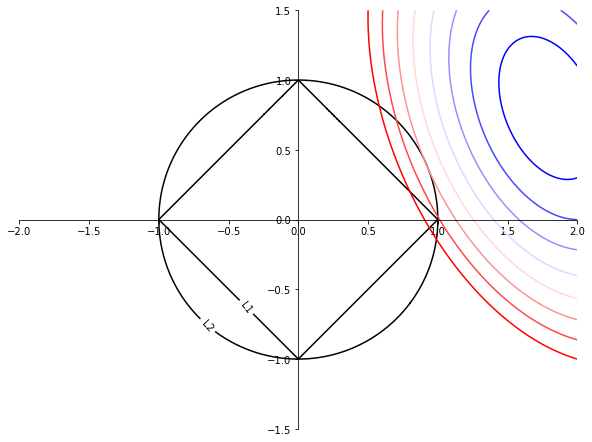

In [36]:
xline = np.linspace(-2., 2, 1001)
yline = np.linspace(-1.5, 1.5, 1001)
xx, yy = np.meshgrid(xline, yline)

l2 = xx ** 2 + yy ** 2
l1 = np.abs(xx) + np.abs(yy)

quadratic = np.sqrt(2 * (xx - 2.) ** 2 + (yy - 1.7) ** 2 + xx * yy)

plt.figure(figsize=(10, 10))
l2_contour = plt.contour(xx, yy, l2, levels=1, colors='k')
l1_contour = plt.contour(xx, yy, l1, levels=1, colors='k')
quadratic_contour = plt.contour(xx, yy, quadratic, levels=[1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 2.3])


ax = plt.gca()
ax.set_aspect("equal")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
plt.clabel(l2_contour, inline=1, fontsize=10, fmt={1.0: 'L2'}, manual=[(-1, -1)])
plt.clabel(l1_contour, inline=1, fontsize=10, fmt={1.0: 'L1'}, manual=[(-1, -1)])
#plt.clabel(quadratic_contour, inline=1, fontsize=10)

# Heatmap table

In [62]:
from sklearn.preprocessing import PolynomialFeatures, scale
X, y = boston.data, boston.target
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

param_grid = {'alpha': np.logspace(-4, -1, 10), 'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
print(param_grid)

(506, 104)
{'alpha': array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.02,  0.05,  0.1 ]), 'l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.98, 1]}


In [63]:
from sklearn.linear_model import ElasticNet
grid = GridSearchCV(ElasticNet(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

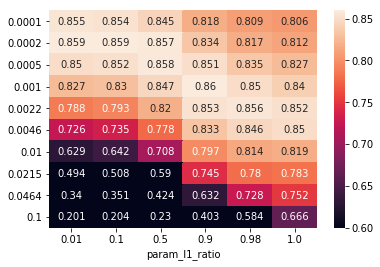

In [64]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

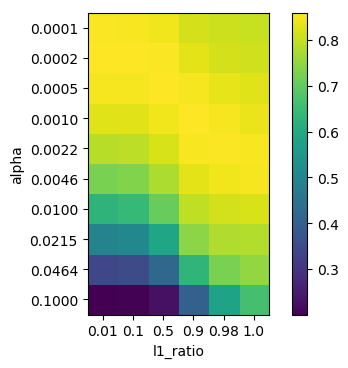

In [65]:
plt.figure(dpi=100)
plt.imshow(res, cmap='viridis') #, vmin=.70, vmax=.825)
plt.colorbar()
alphas = param_grid['alpha']
l1_ratio = np.array(param_grid['l1_ratio'])
plt.xlabel("l1_ratio")
plt.ylabel("alpha")
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(l1_ratio)), l1_ratio);

# Individual horizontal barchart

In [41]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import scale

iris = load_iris()
X, y = iris.data, iris.target
logreg = LogisticRegression(fit_intercept=False, multi_class="multinomial", solver="lbfgs").fit(scale(X), y)

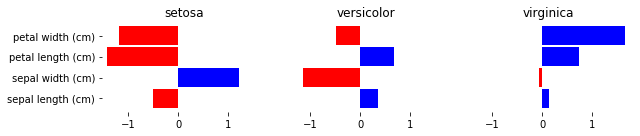

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(9, 2))
for ax, coef, classname in zip(axes, logreg.coef_, iris.target_names):
    ax.barh(range(4), coef, height=0.9, color=plt.cm.bwr_r(np.sign(coef)))
    ax.set_xlim(logreg.coef_.min() - .1, logreg.coef_.max() + .1)

    ax.set_title(classname)
    ax.set_frame_on(False)
    ax.set_yticks(())
    
axes[0].set_yticks(range(4))
axes[0].set_yticklabels(iris.feature_names)
plt.tight_layout()

# 3D plot - Gradient Descent

Some more details [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def branin(x):
    x1 = x[0]
    x2 = x[1]
    a = 1.
    b = 5.1 / (4.*np.pi**2)
    c = 5. / np.pi
    r = 6.
    s = 10.
    t = 1. / (8.*np.pi)
    ret  = a*(x2-b*x1**2+c*x1-r)**2+s*(1-t)*np.cos(x1)+s
    return ret

def branin_derivative(x):
    x1 = x[0]
    x2 = x[1]
    a = 1.
    b = 5.1 / (4.*np.pi**2)
    c = 5. / np.pi
    r = 6.
    s = 10.
    t = 1. / (8.*np.pi)
    # d  = a*(x2-b*x1**2+c*x1-r)**2 + s*(1-t)*np.cos(x1)+s
    d1 = (-2*b*x1 + c)*a*2*(x2-b*x1**2+c*x1-r) - s*(1-t)*np.sin(x1)
    d2 = 2 * a * (x2-b*x1**2+c*x1-r)
    return d1, d2
    

range_x = np.linspace(-5, 10, 100)
range_y = np.linspace(0, 15, 100)
xx, yy = np.meshgrid(range_x, range_y)
res = np.array([branin(x) for x in zip(xx.ravel(), yy.ravel())])
res = res.reshape(xx.shape)

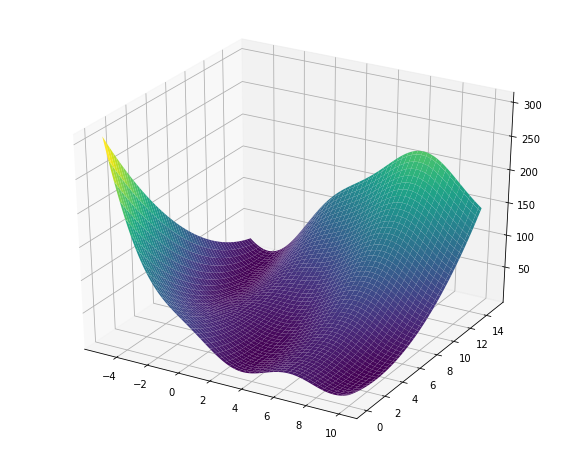

In [59]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10,8))

surf = ax.plot_surface(xx, yy, res, cmap="viridis",
                       linewidth=0)
plt.show()


[  5.86  13.25]
166.097194351
[ 3.14  2.31]
0.398932870612
[ 5.18  2.35]
15.6296204426


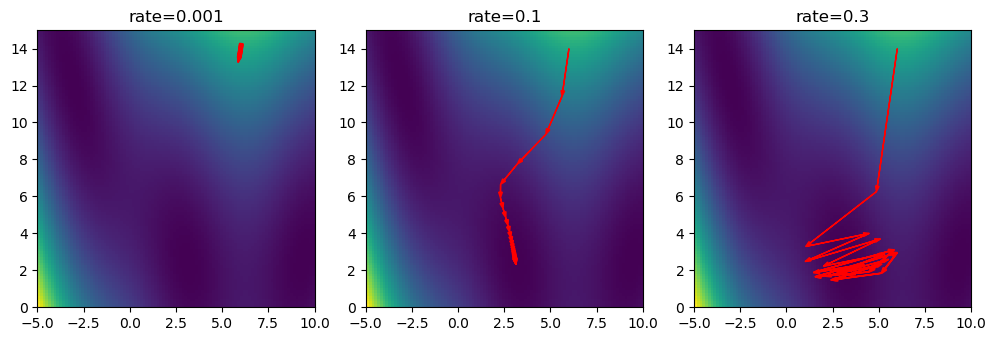

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5), dpi=100)
for ax, rate in zip(axes, [0.001, 0.1, 0.3]):
    ax.set_title("rate={}".format(rate))
    ax.imshow(res, origin="lower", extent=(range_x[0], range_x[-1], range_y[0], range_y[-1]),cmap="viridis")
    x = np.array((6, 14))
    for i in range(30):
        step = -rate * np.array(branin_derivative(x))
        ax.arrow(x[0], x[1], step[0], step[1], color='r', head_width=0.2, length_includes_head=True)
        x = x + step
    print(x)
    print(branin(x))
plt.tight_layout()

# Covariance matrix

In [66]:
from sklearn.datasets import load_boston

In [67]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [68]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
cov = np.cov(X_train_scaled, rowvar=False)

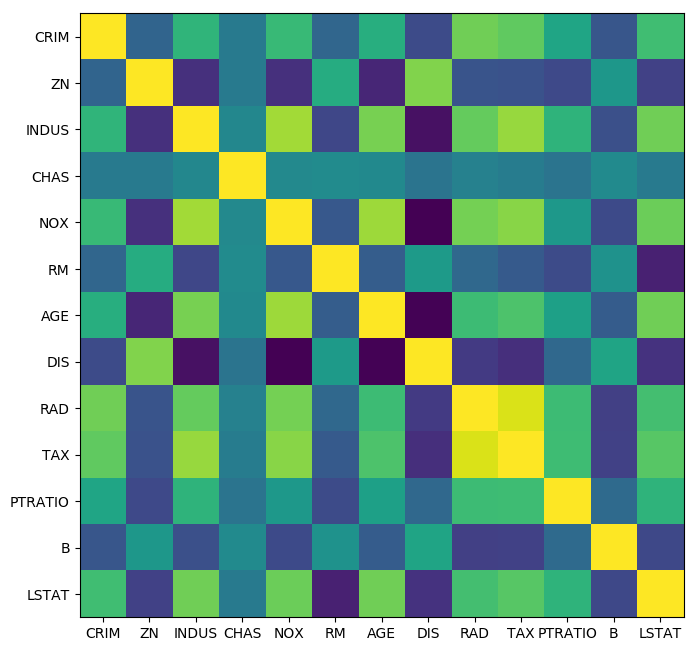

In [70]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov, cmap='viridis')
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.yticks(range(X.shape[1]), boston.feature_names);

In [71]:
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(hierarchy.ward(cov), no_plot=True)['ivl'], dtype="int")

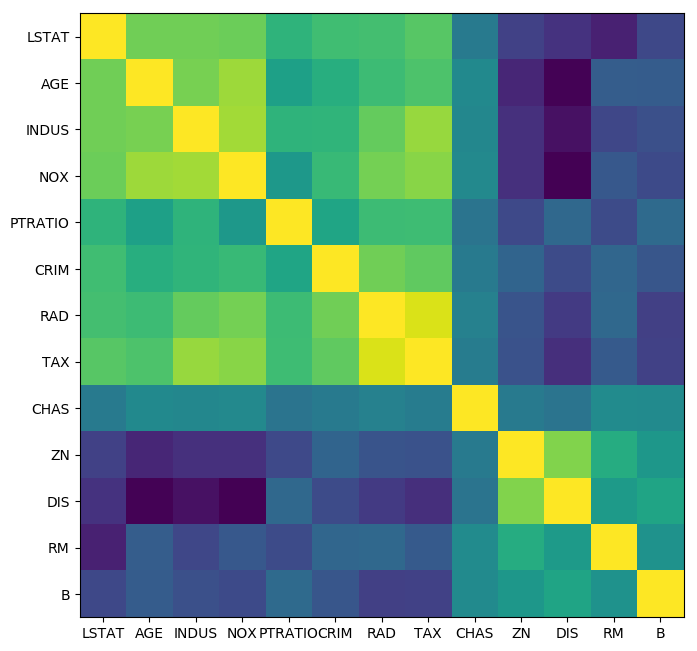

In [73]:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(cov[order, :][:, order],cmap='viridis')
plt.xticks(range(X.shape[1]), boston.feature_names[order])
plt.yticks(range(X.shape[1]), boston.feature_names[order]);

In [75]:
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, y)

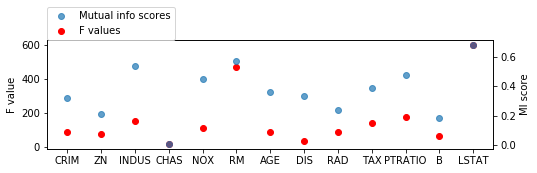

In [76]:
from sklearn.feature_selection import mutual_info_regression
scores = mutual_info_regression(X_train, y_train, discrete_features=[3])

fig = plt.figure(figsize=(8, 2))
line_f, = plt.plot(f_values, 'o', c='r')
plt.ylabel("F value")
ax2 = plt.twinx()
line_s, = ax2.plot(scores, 'o', alpha=.7)
ax2.set_ylabel("MI score")
plt.xticks(range(X.shape[1]), boston.feature_names)
plt.legend([line_s, line_f], ["Mutual info scores", "F values"], loc=(0, 1))

# SVM - Support vectors

Text(0.5,1,'C=1')

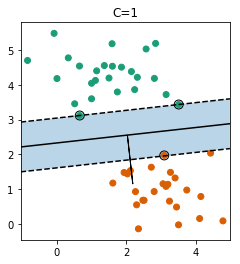

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
X[:, 0] *= 1.5
# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min() - .2, X[:, 0].max() + .2)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin


# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.fill_between(xx, yy_down, yy_up, alpha=.3)
plt.scatter(X[:, 0], X[:, 1], c=plt.cm.Dark2(y))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolor='k')
plt.arrow(xx[25], yy[25], w[0], w[1])
plt.gca().set_aspect("equal")
plt.xlim(xx[0], xx[-1])
plt.title("C=1")

# Plot trees

In [79]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [80]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [82]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)

In [84]:
print(tree_dot)

digraph Tree {
node [shape=box] ;
0 [label="worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]"] ;
1 [label="worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.008\nsamples = 240\nvalue = [1, 239]"] ;
1 -> 2 ;
3 [label="gini = 0.499\nsamples = 19\nvalue = [10, 9]"] ;
1 -> 3 ;
4 [label="worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.497\nsamples = 37\nvalue = [20, 17]"] ;
4 -> 5 ;
6 [label="gini = 0.03\nsamples = 130\nvalue = [128, 2]"] ;
4 -> 6 ;
}


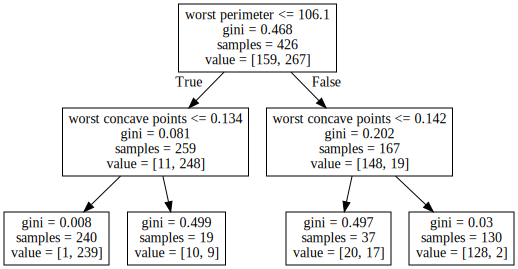

In [88]:
import graphviz
graphviz.Source(tree_dot)

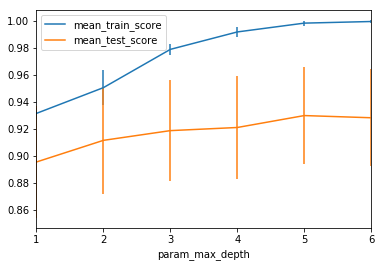

In [90]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100), return_train_score=True)
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

# Other

Log-loss of
 * uncalibrated classifier trained on 800 datapoints: 1.280 
 * classifier trained on 600 datapoints and calibrated on 200 datapoint: 0.534


/home/tungngo/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.05, 1.05)

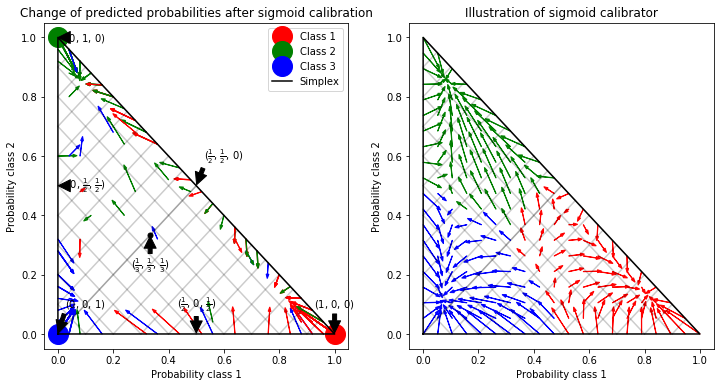

In [92]:
# http://scikit-learn.org/dev/auto_examples/calibration/plot_calibration_multiclass.html

# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.


import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss, brier_score_loss

np.random.seed(0)

# Generate data
X, y = make_blobs(n_samples=1000, n_features=2, random_state=42,
                  cluster_std=5.0)
X_train, y_train = X[:600], y[:600]
X_valid, y_valid = X[600:800], y[600:800]
X_train_valid, y_train_valid = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Train uncalibrated random forest classifier on whole train and validation
# data and evaluate on test data
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train_valid, y_train_valid)
clf_probs = clf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)
#score = brier_score_loss(y_test, clf_probs[:, 1])

# Train random forest classifier, calibrate on validation data and evaluate
# on test data
clf = RandomForestClassifier(n_estimators=25)
clf.fit(X_train, y_train)
clf_probs = clf.predict_proba(X_test)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv="prefit")
sig_clf.fit(X_valid, y_valid)
sig_clf_probs = sig_clf.predict_proba(X_test)
sig_score = log_loss(y_test, sig_clf_probs)
#sig_score = brier_score_loss(y_test, sig_clf_probs[:, 1])

# Plot changes in predicted probabilities via arrows
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
colors = ["r", "g", "b"]
for i in range(clf_probs.shape[0]):
    plt.arrow(clf_probs[i, 0], clf_probs[i, 1],
              sig_clf_probs[i, 0] - clf_probs[i, 0],
              sig_clf_probs[i, 1] - clf_probs[i, 1],
              color=colors[y_test[i]], head_width=1e-2)

# Plot perfect predictions
plt.plot([1.0], [0.0], 'ro', ms=20, label="Class 1")
plt.plot([0.0], [1.0], 'go', ms=20, label="Class 2")
plt.plot([0.0], [0.0], 'bo', ms=20, label="Class 3")

# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

# Annotate points on the simplex
plt.annotate(r'($\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$)',
             xy=(1.0/3, 1.0/3), xytext=(1.0/3, .23), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.plot([1.0/3], [1.0/3], 'ko', ms=5)
plt.annotate(r'($\frac{1}{2}$, $0$, $\frac{1}{2}$)',
             xy=(.5, .0), xytext=(.5, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $\frac{1}{2}$, $\frac{1}{2}$)',
             xy=(.0, .5), xytext=(.1, .5), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($\frac{1}{2}$, $\frac{1}{2}$, $0$)',
             xy=(.5, .5), xytext=(.6, .6), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $0$, $1$)',
             xy=(0, 0), xytext=(.1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($1$, $0$, $0$)',
             xy=(1, 0), xytext=(1, .1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
plt.annotate(r'($0$, $1$, $0$)',
             xy=(0, 1), xytext=(.1, 1), xycoords='data',
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center', verticalalignment='center')
# Add grid
plt.grid("off")
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1-x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)

plt.title("Change of predicted probabilities after sigmoid calibration")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.legend(loc="best")

print("Log-loss of")
print(" * uncalibrated classifier trained on 800 datapoints: %.3f "
      % score)
print(" * classifier trained on 600 datapoints and calibrated on "
      "200 datapoint: %.3f" % sig_score)

# Illustrate calibrator
plt.subplot(1, 2, 2)
# generate grid over 2-simplex
p1d = np.linspace(0, 1, 20)
p0, p1 = np.meshgrid(p1d, p1d)
p2 = 1 - p0 - p1
p = np.c_[p0.ravel(), p1.ravel(), p2.ravel()]
p = p[p[:, 2] >= 0]

calibrated_classifier = sig_clf.calibrated_classifiers_[0]
prediction = np.vstack([calibrator.predict(this_p)
                        for calibrator, this_p in
                        zip(calibrated_classifier.calibrators_, p.T)]).T
prediction /= prediction.sum(axis=1)[:, None]

# Plot modifications of calibrator
for i in range(prediction.shape[0]):
    plt.arrow(p[i, 0], p[i, 1],
              prediction[i, 0] - p[i, 0], prediction[i, 1] - p[i, 1],
              head_width=1e-2, color=colors[np.argmax(p[i])])
# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], 'k', label="Simplex")

plt.grid("off")
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], 'k', alpha=0.2)
    plt.plot([0, 0 + (1-x)/2], [x, x + (1-x)/2], 'k', alpha=0.2)
    plt.plot([x, x + (1-x)/2], [0, 0 + (1-x)/2], 'k', alpha=0.2)

plt.title("Illustration of sigmoid calibrator")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)